# 데이터 시각화 I 실습

막대그래프, 선그래프, 히스토그램, 파이차트, 산점도, 박스플롯을 구현해봅니다.

실습에 사용하는 데이터는 https://www.kaggle.com/datasets/nikhil7280/weather-type-classification 데이터입니다.

본인이 원하는 다른 데이터가 있다면 다른 데이터를 사용하셔도 좋습니다.

데이터에서 적절한 데이터를 선정하여 각 시각화 분석에 적용합니다.

시각화를 진행할 때는 차트 뿐만 아니라 범례, 제목, 레이블, 색상, 크기 등 여러가지 요소들을 직접 개발하시면서

데이터의 특성을 잘 이해해보시면 좋을 것 같습니다.

In [1]:
! mkdir data
! kaggle datasets download -d nikhil7280/weather-type-classification -p ./data
! unzip ./data/weather-type-classification.zip -d ./data # unzip {압축할 데이터} {압축 결과를 저장할 경로}

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
License(s): other
100%|█████████████████████████████████████████| 186k/186k [00:00<00:00, 819kB/s]
100%|█████████████████████████████████████████| 186k/186k [00:00<00:00, 815kB/s]
Archive:  ./data/weather-type-classification.zip
  inflating: ./data/weather_classification_data.csv  


In [15]:
# ! pip3 install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 10.0 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip


In [17]:
! ls

KTB_Day7_GenAI_Practice_ipynb의_사본.ipynb
KTB_Day7_GenAI_ipynb의_사본.ipynb
data


In [16]:
# 기본 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [21]:
# 데이터 읽어오기 
data = pd.read_csv('./data/weather_classification_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [22]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

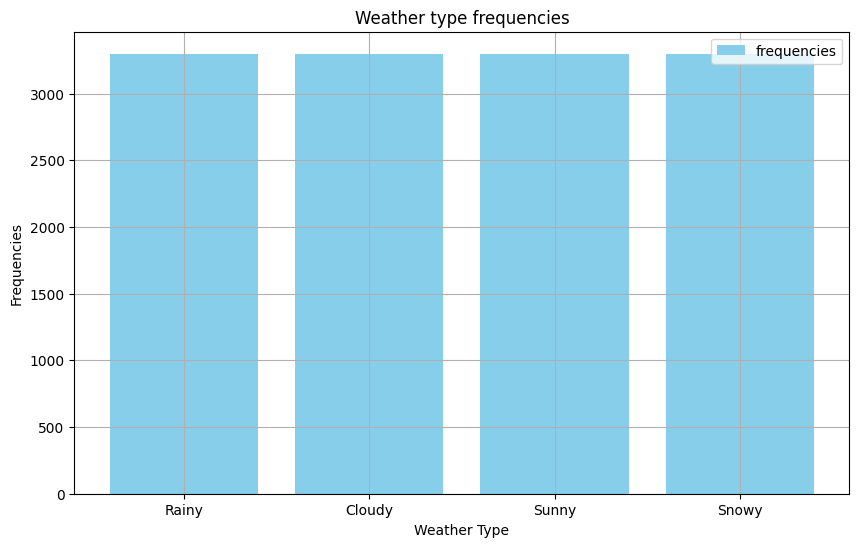

In [37]:
# 1. 막대그래프 - Weather Type의 빈도수를 그려본다. 


# 데이터 가져오기 
def cate_preprocessing(df, column_name):
    result = df[column_name].value_counts() # 해당 컬럼의 값들의 빈도수를 계산해줌, 결과는 Series로 
    weather_types = result.index.tolist() # 날씨 타입을 담은 lst
    frequencies = result.values.tolist() # 날씨 타입 별 빈도수를 담은 리스트
    return weather_types, frequencies



def barplot(weather_types, frequencies):
    # 막대 그래프 plot 
    plt.figure(figsize = (10,6))
    plt.bar(weather_types, frequencies, color = 'skyblue', label = "frequencies" )
    plt.title("Weather type frequencies")
    plt.xlabel("Weather Type")
    plt.ylabel("Frequencies")
    plt.legend() #범례 추가
    plt.grid(True) #그리드 추가 
    plt.show()

weather_types, frequencies = cate_preprocessing(df = data, column_name = 'Weather Type')
barplot(weather_types, frequencies)




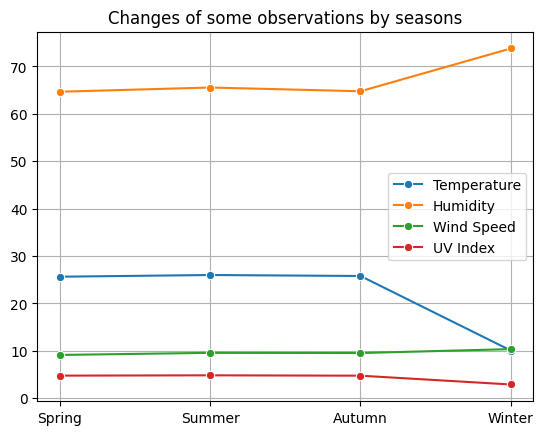

"\nfig, axes = plt.subplots(2,2,figsize = (10,8))\n\nfor index, season in enumerate(seasons):\n    #0 1 2 3 \n    #0: [0,0] n>2: x = 0 / x=1 \n    #1: [0,1] n%2 == 1 > \n    #2: [1,0]\n    #3: [1,1]\n    axes_x = [ 0 if index < 2 else 1]\n    axes_y = [ 0 if index%2 == 0 else 1]\n    print(f'{season}: {axes_x},{axes_y}')\n"

In [77]:
# 2. 선 그래프 - 계절 별 관측값 평균 변화를 비교


seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
cols_to_vis = ['Temperature', 'Humidity', 'Wind Speed','UV Index']  #변화를 관찰할 컬럼





def line_plot(df, cols_to_vis):
    plt.title("Changes of some observations by seasons")
    plt.grid(True)
    plt.xlabel = "Seaons"
    plt.ylabel = "Values"
    
    for col in cols_to_vis:
        avgs_season = [] #계절별 평균값 lst
        for season in seasons:
            df_season = df[df['Season'] == season]
            avgs_season.append(df_season[col].mean())
            #print(f'-{season}:{df_season[col].mean()}')
        sns.lineplot(x = seasons, y = avgs_season, marker = 'o',label = col)
    plt.show()

line_plot(data, cols_to_vis)





"""
fig, axes = plt.subplots(2,2,figsize = (10,8))

for index, season in enumerate(seasons):
    #0 1 2 3 
    #0: [0,0] n>2: x = 0 / x=1 
    #1: [0,1] n%2 == 1 > 
    #2: [1,0]
    #3: [1,1]
    axes_x = [ 0 if index < 2 else 1]
    axes_y = [ 0 if index%2 == 0 else 1]
    print(f'{season}: {axes_x},{axes_y}')
"""

(array([  58.,   57.,   59.,   71.,   56.,   44.,   73.,   45.,   72.,
        3991., 6486., 1709.,   49.,   53.,   63.,   42.,   78.,   59.,
          67.,   68.]),
 array([ 800.12  ,  820.0745,  840.029 ,  859.9835,  879.938 ,  899.8925,
         919.847 ,  939.8015,  959.756 ,  979.7105,  999.665 , 1019.6195,
        1039.574 , 1059.5285, 1079.483 , 1099.4375, 1119.392 , 1139.3465,
        1159.301 , 1179.2555, 1199.21  ]),
 <BarContainer object of 20 artists>)

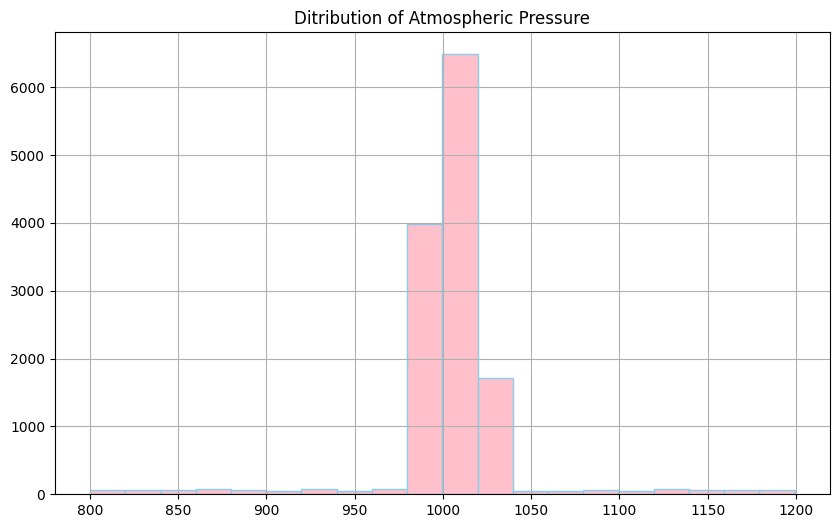

In [133]:
# 3. 히스토그램 - 연속형 데이터의 분포를 나타낸다. 

# 대기압(Atmospheric Pressure)의 데이터 분포를 나타낸다. 
def hist_plot(col):
    col_data = data[col].values.tolist()
    plt.figure(figsize=(10,6))
    
    plt.title(f"Ditribution of {col}")
    plt.xlabel = col
    plt.ylabel = 'Frequency'
    plt.grid(True)
    return plt.hist(col_data, bins = 20, color = 'pink', edgecolor = 'skyblue')
    
hist_plot('Atmospheric Pressure')


In [101]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


([<matplotlib.patches.Wedge at 0x15fe4ff40>,
 [Text(-0.7778174639428924, 0.7778174546675123, 'Rainy'),
  Text(-0.8485279941217658, -0.848528280725924, 'Cloudy'),
  Text(0.7778177173879477, -0.7778172012223713, 'Sunny'),
  Text(0.7778174453921319, 0.7778174732182725, 'Snowy')],
 [Text(-0.4242640712415776, 0.42426406618227935, '25.00%'),
  Text(-0.49497466323769673, -0.49497483042345564, '25.00%'),
  Text(0.4242642094843351, -0.42426392793947526, '25.00%'),
  Text(0.424264061122981, 0.42426407630087587, '25.00%')])

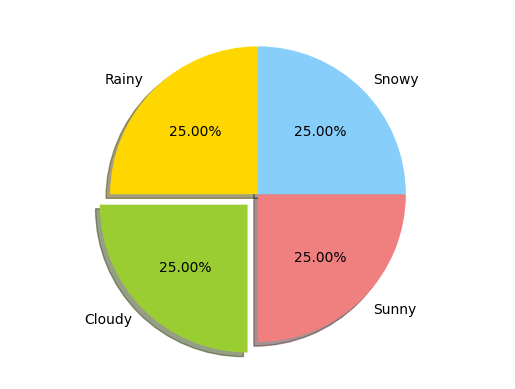

In [149]:
# 4. 파이차트


# Weather Type의 비율을 알아보자
def pie_chart(col):
    explode = (0, 0.1, 0, 0)
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

    #plt.figure(figsize = (10,6))
    labels = data[col].unique().tolist()
    sizes =  [ (data[col] == label).sum() for label in labels]
    plt.axis('equal')
    return plt.pie(sizes, labels = labels, explode= explode, colors = colors, autopct='%1.2f%%', startangle=90, shadow = True) #autopic: 소숫점 아래 자리 결정, explode = 해당 조각 얼마나 떨어트릴 것인가? 
    
    

pie_chart(col = "Weather Type")

In [112]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


<Axes: title={'center': 'Correlation between Temperature abnd Humidity'}>

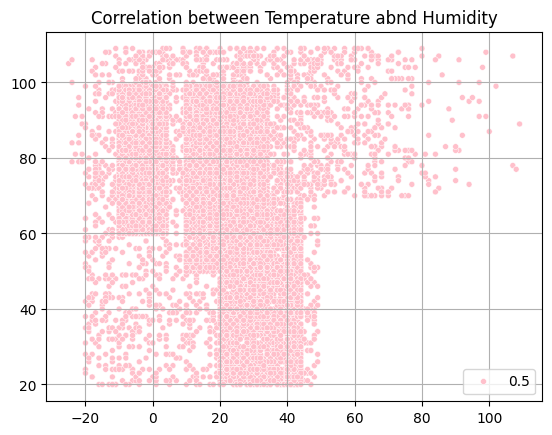

In [137]:
# 5. 산점도



def scatter_plot(x,y):
    #데이터 가져오기 
    data_x, data_y = data[x].values.tolist(), data[y].values.tolist()

    #그래프 그리기
    #plt.figure(figsize=(10,6))
    
    plt.title(f"Correlation between {x} abnd {y}")
    plt.xlabel, plt.ylabel = x, y
    plt.grid(True)
    
    return sns.scatterplot(x=data_x, y = data_y, color = "pink", size= 0.5)

# Humidity, Temperature	간의 관계를 알아보자
scatter_plot('Temperature','Humidity') # 별 유의미한 관계 없음


<Axes: title={'center': 'Changes of Temperature by seasons'}, xlabel='Season', ylabel='Temperature'>

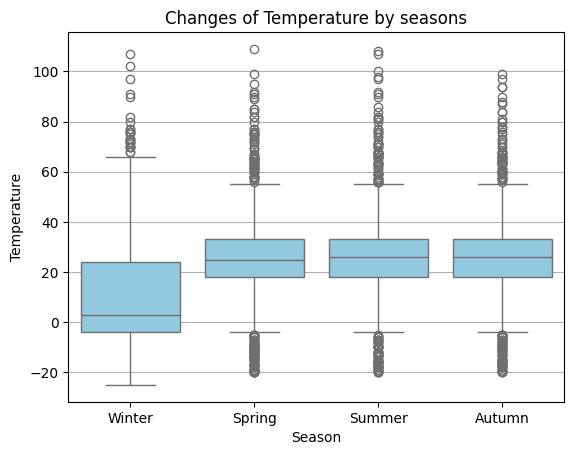

In [143]:
# 6. 박스플롯

# 계절별로 온도 분포 살펴보기 




def box_plot(df, col):
    plt.title(f"Changes of {col} by seasons")
    plt.grid(True)
    plt.xlabel = "Season"
    plt.ylabel = "Value"
    return sns.boxplot(x="Season", y = col, data = df, color = 'skyblue')

box_plot(data, col = 'Temperature')





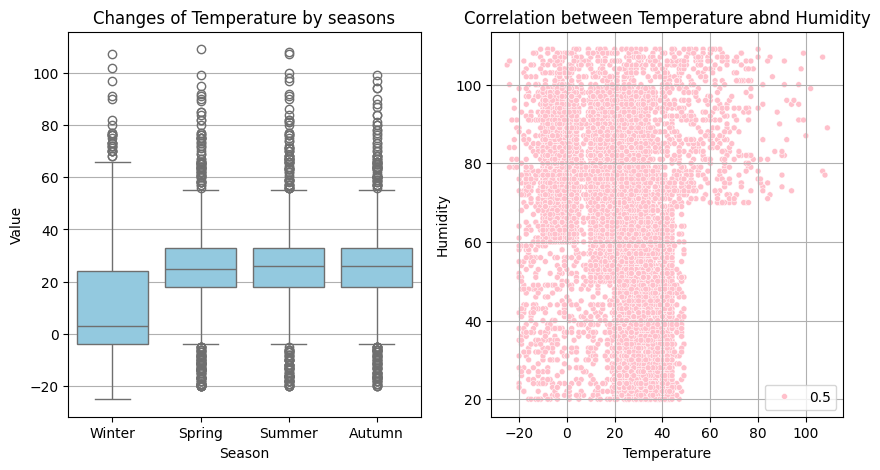

In [165]:
# 7. 여러 시각화 차트 합쳐보기

fig, axes = plt.subplots(1,2,figsize = (10,5))

# 그래프 그릴 함수들 정의 

def box_plot2(df, col, ax):
    ax.set_title(f"Changes of {col} by seasons")
    ax.grid(True)
    ax.set_xlabel("Season")
    ax.set_ylabel("Value")
    sns.boxplot(x="Season", y = col, data = df, color = 'skyblue', ax=ax)


def scatter_plot2(df, x,y,ax):
    #데이터 가져오기 
    data_x, data_y = df[x].values.tolist(), df[y].values.tolist()

    #그래프 그리기
    #plt.figure(figsize=(10,6))
    
    ax.set_title(f"Correlation between {x} abnd {y}")
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    #ax.xlabel, plt.ylabel = x, y
    ax.grid(True)
    
    sns.scatterplot(x=data_x, y = data_y, color = "pink", size= 0.5, ax=ax)

box_plot2(data, col = 'Temperature', ax = axes[0])
scatter_plot2(data, 'Temperature','Humidity', ax = axes[1]) # 별 유의미한 관계 없음

#plt.show()


#axes[1,0] = line_plot(data, col = 'Temperature')
#axes[1,1] = pie_chart(col = "Weather Type")


